# Нереляционные базы данных

Мы уже знаем, что реляционные базы данных хранят значения в виде таблицы, и как можно догадаться, нереляционные БД хранят данные в иной форме.

Например, данные могут храниться как:
* простые пары «ключ–значение» ;
* JSON;
* документ;
* граф.

Попробуем разобраться более детально, в чем их отличие. В реляционных таблицах данные ячеек обычно близки по смыслу к объектам в реальном мире. Как вы помните, в примере с транзакциями мы разбирали «почти реальные» счета.

А вот в нереляционных БД объекты хранят скорее в виде иерархических структур, при этом количество атрибутов (тут следует понимать, что в реляционных БД это столбец, а в нереляционных — дополнительная строка при описании объекта) у таких объектов может быть вообще произвольным.

Попробуем разобраться в этом на примере торгового каталога.

В реляционных БД нам надо точно описать данные, которые будут храниться в таблице. Ну или хотя бы минимальный набор, например: название, цена, количество, и уникальный идентификатор на складе.

<center>название | цена   | количество  |  уникальный идентификатор</center>
<center>тт       | 12     |       1     |  00112255</center>
<center>тте 	 | 17     |       3     |   0125512</center>

Вроде бы всё выглядит логично, но что, если нам потребуется добавить какие-нибудь дополнительные свойства объектов? Например, спустя время нам потребовалось хранить также вес изделия, либо, если изделие жидкое  —  объем. Да, конечно не сложно изменить таблицу и добавить в неё две дополнительные колонки «вес» и «объем», и если данных нет — записывать NULL.

Хорошо, но что, если спустя время возникнет задача ещё раз расширить БД? И да, при таком устройстве БД она скорее всего возникнет, и со временем разобраться в структуре такой БД будет очень-очень тяжело.

Рассмотрим этот же каталог на примере нереляционной БД. Пусть это будет БД, которая хранит JSON’ы  оптимально для условий нашего примера.

Тогда сами данные будут выглядеть примерно так:

In [4]:
{
  "название": "тт",
  "цена": 12,
  "количество": 1,
  "уникальный идентификатор": "00112255"
},
{
"название": "ттt", "цена": 17, "количество": 3, "уникальный идентификатор": "0125512"
}

{'название': 'ттt',
 'цена': 17,
 'количество': 3,
 'уникальный идентификатор': '0125512'}

И при возникновении такой же задачи — добавить дополнительные поля к каждому объекту — мы просто берём и сразу передаем эти дополнительные поля, ничего не описывая лишний раз. При этом структура уже будет выглядеть следующим образом:

In [3]:
{
"название": "тт", "цена": 12, "количество": 1, "уникальный идентификатор": "00112255", "Вес":"12кг"},
{
"название": "ттt", "цена": 17, "количество": 3, "уникальный идентификатор": "0125512", "Объем":"1л"
}

{'название': 'ттt',
 'цена': 17,
 'количество': 3,
 'уникальный идентификатор': '0125512',
 'Объем': '1л'}

Немного усложним наш пример. На склад поступает коробка, в которой хранятся несколько однотипных объектов. В реляционной БД нам бы пришлось создать таблицу для каждого объекта и таблицу для коробки, а вот в нереляционной БД это можно было бы сделать с помощью вложения одного объекта в другой, и для этого не потребовалось бы никаких дополнительных работ и ресурсов.

In [1]:
{
"название": "СуперКоробкаBOX", "цена": 100500, "количество": 1, "уникальный идентификатор": "112345", "Содержимое":  [   {    "Название":"Странная деталь 1",    "Вес":"1кг"   },  {    "Название":"Странная бутыль 1",    "Объём":"1л"   } ] }

{'название': 'СуперКоробкаBOX',
 'цена': 100500,
 'количество': 1,
 'уникальный идентификатор': '112345',
 'Содержимое': [{'Название': 'Странная деталь 1', 'Вес': '1кг'},
  {'Название': 'Странная бутыль 1', 'Объём': '1л'}]}

Дальше попробуем разобраться с тем, какие существуют основные нереляционные БД, и в чем их принципиальное различие. В зависимости от модели данных, выделяются несколько различных типов систем, которые разберем далее:
* ключ-значение;
* семейство столбцов;
* графовые СУБД;
* документоориентированные СУБД.

## Ключ — значение

При модели «ключ-значение» хранилище представляет собой большую таблицу «ключ-значение». Такой тип является самым простым вариантом нереляционных баз данных. Обычно в таких системах хранят изображения, кэши объектов или используют, когда нужно сделать хорошо масштабируемую БД.

Примеры таких хранилищ: Berkeley DB, MemcacheDB[en], Redis, Riak, Amazon DynamoDB.

В большинстве случаев такие хранилища позволяют использовать только самые простые операции: выборка, вставка и удаление. Чтобы изменить значение полностью или частично, приходится полностью переписывать существующее значение. Относительно долгое время занимает запись больших значений.

В основном можно хранить в связке «ключ-значение» , а именно в значении, любые данные. Лишь некоторые хранилища ограничивают максимальный размер значения.

На примере ниже показана таблица, в первой колонке которой мы храним ключ, а во второй — какие-то необходимые нам данные.

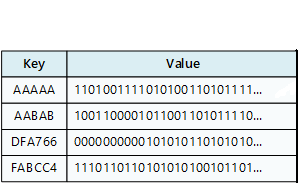

Такие БД в основном используются в приложениях, в которых требуется выполнять поиск на основе одного ключа, а не делать выборку из нескольких таблиц. Кстати одну такую таблицу очень легко масштабировать. Так, например, данные могут оказаться на нескольких узлах.

***Redis*** (Remote Dictionary Server) — это нереляционная структура данных в памяти, используемая в качестве базы данных. Работает с данными ключ-значение. Разработана для максимальной скорости set- и get-запросов. Позволяет нам хранить данные в высокоуровневых структурах данных, таких как строки, хэши, списки, наборы.

Redis достаточно дружелюбен для разработчиков, т.к. поддерживает большинство языков высокого уровня, таких как Java, JavaScript ,Python и C / C ++.

Прежде всего, Redis — это хранилище типа ключ: значение. И самые первые команды, которые все изучают, это команды SET и GET:

SET ключ значение — записывает строку в ключ. Если ключ до этого был, то он будет перезаписан.

Пример:

In [ ]:
SET first 'Hello World'

И получим:

In [ ]:
127.0.0.1:6379> SET first 'Hello World'
OK

Также в значении SET мы можем передать время жизни пары:

In [ ]:
SET second 'GoodBye World' EX 10 

Данное значение будет доступно в течении 10 секунд после создания, а потом будет удалено. Ведь очень часто в разных сервисах бывает, что нам присылают код, который действителен в течении скажем 40 секунд.

Метод GET — это получение значения по ключу. Сейчас попробуем получить ранее созданное первое значение:

In [ ]:
GET first

Получаем :

In [ ]:
127.0.0.1:6379> GET first
"Hello World"

DEL — это удаление значения по ключу. Попробуем удалить первое значение (first):

In [ ]:
DEL first

Вот, что из этого вышло:

In [ ]:
127.0.0.1:6379> DEL first
(integer) 1
127.0.0.1:6379> GET first
(nil)

## Семейство столбцов

Другой моделью является семейство столбцов или столбчатое хранилище. Семейство столбцов можно представить как таблицу, в которых столбцы разделяются на группы или семейства столбцов.

Каждое столбчатое хранилище имеет набор логически связанных столбцов, которые обычно извлекаются или управляются как единое целое. Другие данные, которые используются в других процессах, хранятся отдельно в других столбчатых хранилищах.

В семейство столбцов можно добавлять новые столбцы на любом этапе, а строки могут быть, а могут и не быть. То есть необязательно, чтобы в строках было обязательное значение.

Дальше рассмотрим пример таблицы с двумя семействами столбцов: Identity и Contact Info. Такие таблицы хорошо подходят для хранения данных с различными схемами.

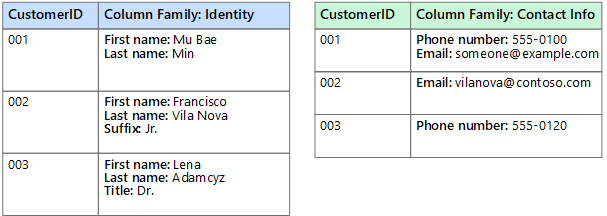

В отличие от БД, ключ — значение, где данные упорядочиваются посредством хэш-кодов, в столбчатых БД упорядочивание происходит с помощью самих значений. Ключ строки рассматривается как первичный индекс, и доступ предоставляется обычно по нему.

Все столбцы хранятся на диске в одном файле. Это очень удобно при считывании больших объемов данных.

## Графовая СУБД

Как следует из названия, графовые СУБД представлены в виде графов. Они используются в задачах, где есть большое количество данных со связями. Рёбра графа хранимые, и не требуют дополнительных вычислений. Индексы указывают нахождение начальной вершины.

Так БД управляют двумя типами данных — узлы и ребра. И как можно понять, узлы представлены как сущности, а рёбра — как связи между ними. Рёбра или грани могут иметь направление, которое указывает на характер связи. Благодаря таким хранилищам, очень удобно выполнять запросы на сеть ребер или узлов. А также достаточно просто анализировать связи между объектами.

На примере ниже представлен граф. Объектами здесь являются сотрудники и отделы. Ребра указывают на отношение, благодаря чему становится ясно, кто в каком отделе работает и кто кому подчиняется. Это достигается тем, что связи имеют направление или, говоря простым языком, выполнены в виде стрелочек, а не линий.

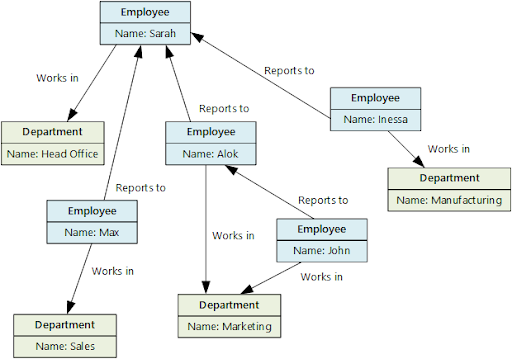

Благодаря такой структуре легко выполнить запросы «кто подчиняется конкретному человеку» или «кто с кем работает в каком отделе». Обычно большинство таких баз данных имеют свой язык запросов, позволяющий очень легко и быстро обходить даже очень большие графы.

## Документо-ориентированная СУБД

Документоориентированные СУБД разработаны для хранения иерархических структур данных. Они очень похожи на модель ключ-значение. И напоминают пример, где мы рассматривали различие между реляционными и нереляционными БД. Данные обычно хранятся как JSON-значение.

В примере ниже хранятся данные о местонахождении магазинов. При том местонахождение описано по-разному, но СУБД понимает, что это адрес, и нормально воспринимает поиск и сравнение.

In [ ]:
{officeName: "3Pillar Noida", 
           {Street: "B-25", City: "Noida",
           State: "UP", Pincode: "201301"}
        }
        {officeName: "3Pillar Timisoara",
           {Boulevard: "Coriolan Brediceanu No. 10",
           Block: "B, Ist Floor",
           City: "Timisoara", Pincode: "300011"}
        }
        {officeName: "3Pillar Cluj",
           {Latitude: "40.748328",
           Longitude: "-73.985560"}
        }

Различие между ключ-значение хранилищем и документо-ориентированным хранилищем в том, что в последнем можно делать поиск не только по ключу, но и по данным. Можно, например, выполнить запрос поиска, где City равно Noida. Такой запрос вернет все документы, которые связаны с этим городом.

Рассмотрим небольшие примеры того, что можно делать документо-ориентированным хранилищем на основе MongoDB.

MongoDB — это документо-ориентированная СУБД, которая использует JSON-подобные данные.

Первый пример — вставка нового документа. Можно вставить с использованием метода insert ,он принимает в качестве аргумента JSON-объект. Далее добавляем в БД данные с одним ключом title. А значениями являются названия разных СУБД.

In [ ]:
db.mybase.insert({title: "MongoDB"})
        db.mybase.insert([{title: "MS SQL"}, {title: "Oracle"}])

Основной фишкой MongoDB, если можно так сказать, является хранение настолько тяжелых и вложенных JSON’ов, насколько сама конструкция JSON позволяет создать и хранить.

В качестве примера в отдельной базе данных articles создадим набор статей, имеющий название и набор ключевых слов:

In [ ]:
db.articles.insert({title: "Обзор NoSQL решений", tags: ["NoSQL", "MongoDB", "memcached", "CouchDB", "Riak", "HBase", "Redis"]})
        db.articles.insert({title: "MongoDB", tags: ["NoSQL", "MongoDB"]})
        db.articles.insert({title: "Redis", tags: ["NoSQL", "Redis"]})

## Извлечение результатов

Для подсчета количества документов в текущей базе данных можно воспользоваться методом count():

In [ ]:
db.mybase.count()
        3

Для того чтобы извлечь результаты, можно воспользоваться методом find():

In [ ]:
db.mybase.find()
        { "_id" : ObjectId("51eb8c2bb4d7d4d898b05fce"), "title" : "MySQL" }
        { "_id" : ObjectId("51eb905ab4d7d4d898b05fcf"), "title" : "PostreSQL" }
        { "_id" : ObjectId("51eb9061b4d7d4d898b05fd0"), "title" : "MongoDB" }
        { "_id" : ObjectId("51eb907db4d7d4d898b05fd1"), "title" : "MS SQL" }
        { "_id" : ObjectId("51eb907db4d7d4d898b05fd2"), "title" : "Oracle" }

Методы допускают использование селекторов, например, для извлечения документа, соответствующего MySQL методу find(), можно передать следующий JSON-объект:

In [ ]:
db.mybase.find({"title" : "MySQL"}){ "_id" : ObjectId("51eb9bb1303d105141c7d74b"), "title" : "MySQL" }

Аналогично можно подсчитать количество статей с названием MySQL, передав методу count селектор "title" : "MySQL"

In [ ]:
db.mybase.count({"title" : "MySQL"})